# 可视化训练日志-训练过程训练集各类别评估指标

2025-4-30

## 设置Matplotlib中文字体

In [1]:
# # windows操作系统
# plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签 
# plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

In [2]:
# Mac操作系统，参考 https://www.ngui.cc/51cto/show-727683.html
# 下载 simhei.ttf 字体文件
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf

In [2]:
# Linux操作系统，例如 云GPU平台：https://featurize.cn/?s=d7ce99f842414bfcaea5662a97581bd1
# 如果遇到 SSL 相关报错，重新运行本代码块即可
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf -O /environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
!rm -rf /home/featurize/.cache/matplotlib

import matplotlib 
import matplotlib.pyplot as plt
matplotlib.rc("font",family='SimHei') # 中文字体


--2025-04-28 09:15:54--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf
正在连接 172.16.0.13:5848... 已连接。
已发出 Proxy 请求，正在等待回应... 200 OK
长度： 10050868 (9.6M) [application/x-font-ttf]
正在保存至: “/environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf”

/environment/minico 100%[===================>]   9.58M  14.3MB/s    用时 0.7s    

2025-04-28 09:15:55 (14.3 MB/s) - 已保存 “/environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf” [10050868/10050868])



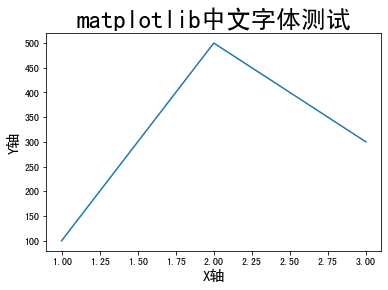

In [3]:
plt.plot([1,2,3], [100,500,300])
plt.title('matplotlib中文字体测试', fontsize=25)
plt.xlabel('X轴', fontsize=15)
plt.ylabel('Y轴', fontsize=15)
plt.show()

## 可视化辅助函数

In [4]:
from matplotlib import colors as mcolors
import random
random.seed(124)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'black', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'sienna', 'chocolate', 'yellow', 'olivedrab', 'yellowgreen', 'darkolivegreen', 'forestgreen', 'limegreen', 'darkgreen', 'green', 'lime', 'seagreen', 'mediumseagreen', 'darkslategray', 'darkslategrey', 'teal', 'darkcyan', 'dodgerblue', 'navy', 'darkblue', 'mediumblue', 'blue', 'slateblue', 'darkslateblue', 'mediumslateblue', 'mediumpurple', 'rebeccapurple', 'blueviolet', 'indigo', 'darkorchid', 'darkviolet', 'mediumorchid', 'purple', 'darkmagenta', 'fuchsia', 'magenta', 'orchid', 'mediumvioletred', 'deeppink', 'hotpink']
markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_",0,1,2,3,4,5,6,7,8,9,10,11]
linestyle = ['--', '-.', '-']

def get_line_arg():
    '''
    随机产生一种绘图线型
    '''
    line_arg = {}
    line_arg['color'] = random.choice(colors)
    # line_arg['marker'] = random.choice(markers)
    line_arg['linestyle'] = random.choice(linestyle)
    line_arg['linewidth'] = random.randint(1, 4)
    # line_arg['markersize'] = random.randint(3, 5)
    return line_arg

## 进入MMSegmentation主目录

In [5]:
import os
os.chdir('mmsegmentation')

In [6]:
os.getcwd()

'/home/featurize/work/mmsegmentation'

## 导入工具包

In [7]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

## 类别列表

In [8]:
# 类别列表
class_list = ['background', 'red']

## 载入日志文件

In [9]:
# 日志文件路径
log_path = './work_dirs/windowdataset-DeepLabV3plus/20250427_180444/20250427_180444.log'

In [10]:
with open(log_path, 'r') as f:
    logs = f.read()

In [11]:
## 定义正则表达式
import re
import numpy as np

def transform_table_line(raw):
    raw = list(map(lambda x: x.split('|'), raw))
    raw = list(map(
      lambda row: list(map(
          lambda col: float(col.strip()),
          row
      )),
      raw
    ))
    return raw

## 横轴-训练迭代次数

In [12]:
x = range(500, 40500, 500)

In [13]:
len(x)

80

## 定义正则表达式

In [14]:
metrics_json = {}
for each_class in class_list: # 遍历每个类别
    re_pattern = r'\s+{}.*?\|(.*)?\|'.format(each_class) # 定义该类别的正则表达式
    metrics_json[each_class] = {}
    metrics_json[each_class]['re_pattern'] = re.compile(re_pattern)

In [15]:
# 匹配
for each_class in class_list: # 遍历每个类别
    find_string = re.findall(metrics_json[each_class]['re_pattern'], logs) # 粗匹配
    find_string = transform_table_line(find_string) # 精匹配
    metrics_json[each_class]['metrics'] = find_string

In [16]:
metrics_json.keys()

dict_keys(['background', 'red'])

## 查看某一类别的评估指标 IoU Acc Dice Fscore Precision Recall

In [26]:
each_class = 'background'
each_class_metrics = np.array(metrics_json[each_class]['metrics'])

In [27]:
print(each_class_metrics)

[[92.26 94.02 95.98 95.98 98.01 94.02]
 [93.13 95.22 96.44 96.44 97.7  95.22]
 [92.9  94.21 96.32 96.32 98.52 94.21]
 [93.84 95.7  96.82 96.82 97.97 95.7 ]
 [92.77 94.4  96.25 96.25 98.18 94.4 ]
 [94.88 98.35 97.37 97.37 96.42 98.35]
 [94.91 97.   97.39 97.39 97.77 97.  ]
 [94.13 95.5  96.97 96.97 98.49 95.5 ]
 [94.77 96.51 97.32 97.32 98.14 96.51]
 [95.09 96.69 97.48 97.48 98.29 96.69]
 [95.17 97.41 97.52 97.52 97.64 97.41]
 [94.39 95.92 97.11 97.11 98.33 95.92]
 [94.89 96.7  97.38 97.38 98.07 96.7 ]
 [93.88 94.96 96.84 96.84 98.81 94.96]
 [95.18 96.82 97.53 97.53 98.25 96.82]
 [94.21 95.68 97.02 97.02 98.39 95.68]
 [94.81 96.26 97.34 97.34 98.44 96.26]
 [95.11 96.64 97.49 97.49 98.36 96.64]
 [95.09 96.96 97.48 97.48 98.01 96.96]
 [95.03 96.52 97.45 97.45 98.4  96.52]
 [94.96 96.49 97.41 97.41 98.35 96.49]
 [95.07 96.8  97.47 97.47 98.15 96.8 ]
 [95.2  96.93 97.54 97.54 98.16 96.93]
 [95.22 96.92 97.55 97.55 98.18 96.92]
 [95.43 97.03 97.66 97.66 98.3  97.03]
 [95.65 97.74 97.78 97.78

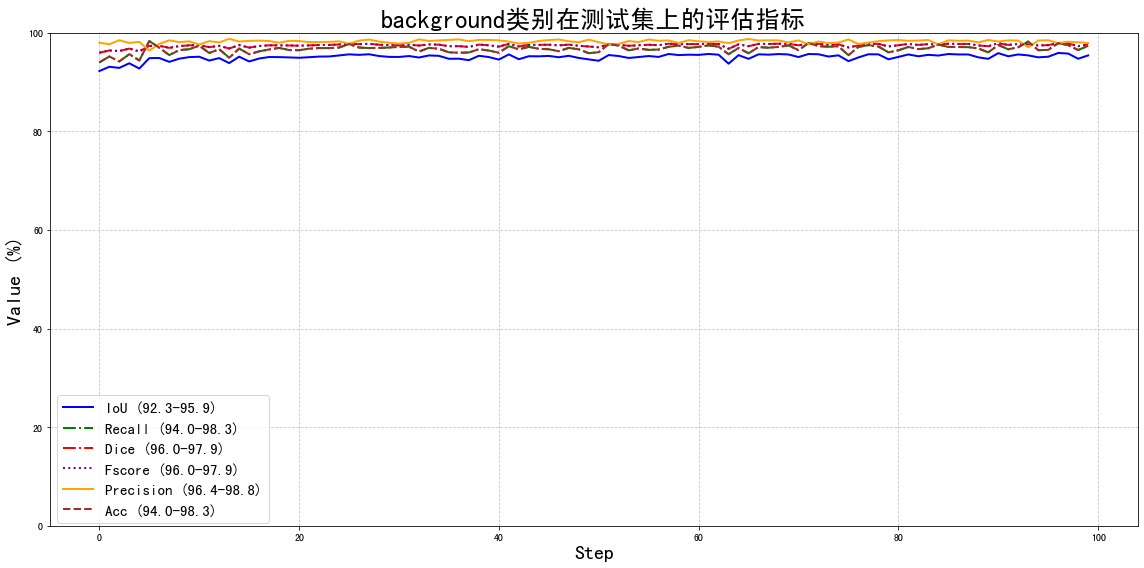

In [28]:
plt.figure(figsize=(16, 8))
plt.clf()  # 清除之前的绘图

# 创建与数据长度匹配的x轴
x = np.arange(len(each_class_metrics))

# 定义颜色和线型
styles = [
    {'color': 'blue', 'linestyle': '-', 'linewidth': 2},  # IoU
    {'color': 'green', 'linestyle': '-.', 'linewidth': 2},  # Recall
    {'color': 'red', 'linestyle': '-.', 'linewidth': 2},  # Dice
    {'color': 'purple', 'linestyle': ':', 'linewidth': 2},  # Fscore
    {'color': 'orange', 'linestyle': '-', 'linewidth': 2},  # Precision
    {'color': 'brown', 'linestyle': '--', 'linewidth': 2}  # Acc
]

metrics = ['IoU', 'Recall', 'Dice', 'Fscore', 'Precision', 'Acc']
for idx, metric in enumerate(metrics):
    y_data = each_class_metrics[:, idx]
    plt.plot(x, y_data, label=f'{metric} ({y_data.min():.1f}-{y_data.max():.1f})', **styles[idx])

plt.ylim(0, 100)
plt.xlabel('Step', fontsize=20)
plt.ylabel('Value (%)', fontsize=20)
plt.title(f'background类别在测试集上的评估指标', fontsize=25)
plt.legend(fontsize=15, bbox_to_anchor=(0, 0.28), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

ValueError: x and y must have same first dimension, but have shapes (80,) and (100,)

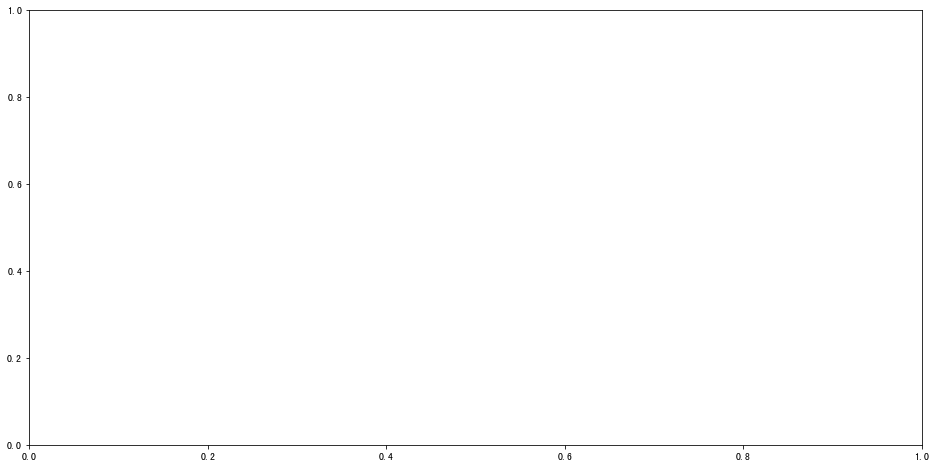

In [23]:
plt.figure(figsize=(16, 8))
plt.clf()  # 清除之前的绘图

# 定义颜色和线型
styles = [
    {'color': 'blue', 'linestyle': '-', 'linewidth': 2},  # IoU
    {'color': 'green', 'linestyle': '-.', 'linewidth': 2},  # Recall
    {'color': 'red', 'linestyle': '-.', 'linewidth': 2},  # Dice
    {'color': 'purple', 'linestyle': ':', 'linewidth': 2},  # Fscore
    {'color': 'orange', 'linestyle': '-', 'linewidth': 2},  # Precision
    {'color': 'brown', 'linestyle': '--', 'linewidth': 2}  # Acc
]

metrics = ['IoU', 'Recall', 'Dice', 'Fscore', 'Precision', 'Acc']
for idx, metric in enumerate(metrics):
    y_data = each_class_metrics[:, idx]
    plt.plot(x, y_data, label=f'{metric} ({y_data.min():.1f}-{y_data.max():.1f})', **styles[idx])

plt.ylim(0, 100)
plt.xlabel('Step', fontsize=20)
plt.ylabel('Value (%)', fontsize=20)
plt.title(f'window类别在测试集上的评估指标', fontsize=25)

# 设置坐标轴刻度标签大小
plt.tick_params(axis='both', which='major', labelsize=16)  # 设置主刻度标签大小
plt.tick_params(axis='both', which='minor', labelsize=12)  # 设置次刻度标签大小（如果有的话）

plt.legend(fontsize=15, bbox_to_anchor=(0, 0.28), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


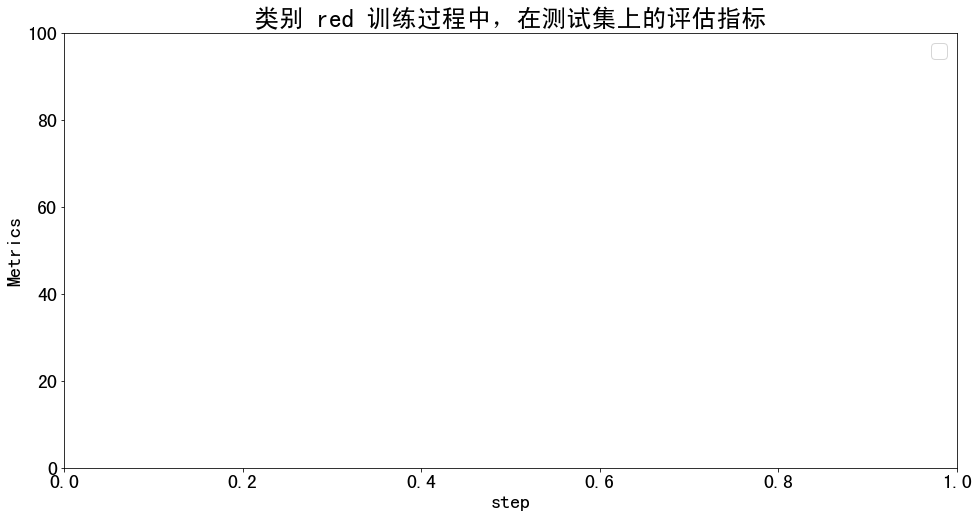

In [24]:
plt.figure(figsize=(16, 8))

for idx, each_metric in enumerate(['IoU', 'Acc', 'Dice', 'Fscore', 'Precision', 'Recall']):

    try:
        plt.plot(x, each_class_metrics[:,idx], label=each_metric, **get_line_arg())
    except:
        pass

plt.tick_params(labelsize=20)
plt.ylim([0, 100])
plt.xlabel('step', fontsize=20)
plt.ylabel('Metrics', fontsize=20)
plt.title('类别 {} 训练过程中，在测试集上的评估指标'.format(each_class), fontsize=25)

plt.legend(fontsize=20)

plt.savefig('图表/类别 {} 训练过程评估指标.pdf'.format(each_class), dpi=120, bbox_inches='tight')

plt.show()

第一行数据: [47.4  77.96 64.32 64.32 54.74 77.96]
IoU 范围: 47.40 ~ 68.30
Acc 范围: 73.12 ~ 89.19
Dice 范围: 64.32 ~ 81.17
Fscore 范围: 64.32 ~ 81.17
Precision 范围: 54.74 ~ 86.45
Recall 范围: 73.12 ~ 89.19


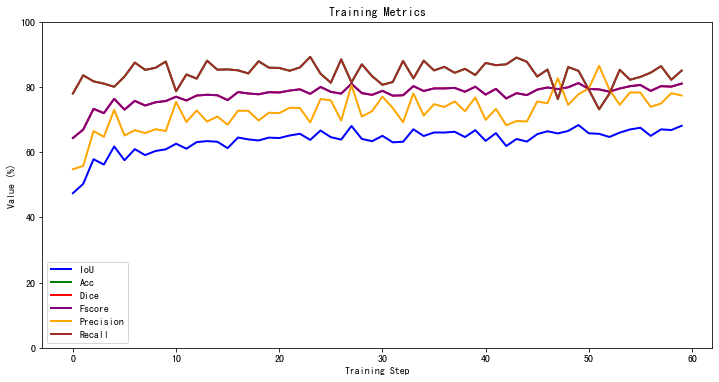

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# 1. 确认数据列顺序
print("第一行数据:", each_class_metrics[0])  # 核对列顺序

# 2. 定义列名（根据实际数据调整顺序！）
metrics = ['IoU', 'Acc', 'Dice', 'Fscore', 'Precision', 'Recall']
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown']

# 3. 绘制所有曲线
plt.figure(figsize=(12, 6))
x = np.arange(len(each_class_metrics))

for idx, (metric, color) in enumerate(zip(metrics, colors)):
    y_data = each_class_metrics[:, idx]
    print(f"{metric} 范围: {y_data.min():.2f} ~ {y_data.max():.2f}")  # 调试输出
    plt.plot(x, y_data, label=metric, color=color, linewidth=2)

plt.xlabel('Training Step')
plt.ylabel('Value (%)')
plt.ylim(0, 100)
plt.legend()
plt.title('Training Metrics')
plt.show()

## x的元素个数，应和`metrics_json[each_class]['metrics']`元素个数一致，绘图才能成功

## 查看每个类别的评估指标 IoU Acc Dice Fscore Precision Recall

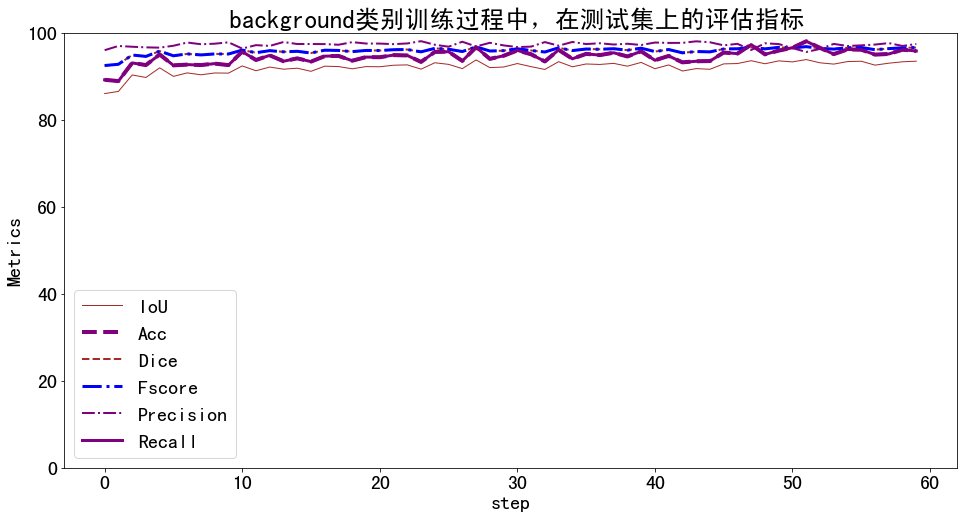

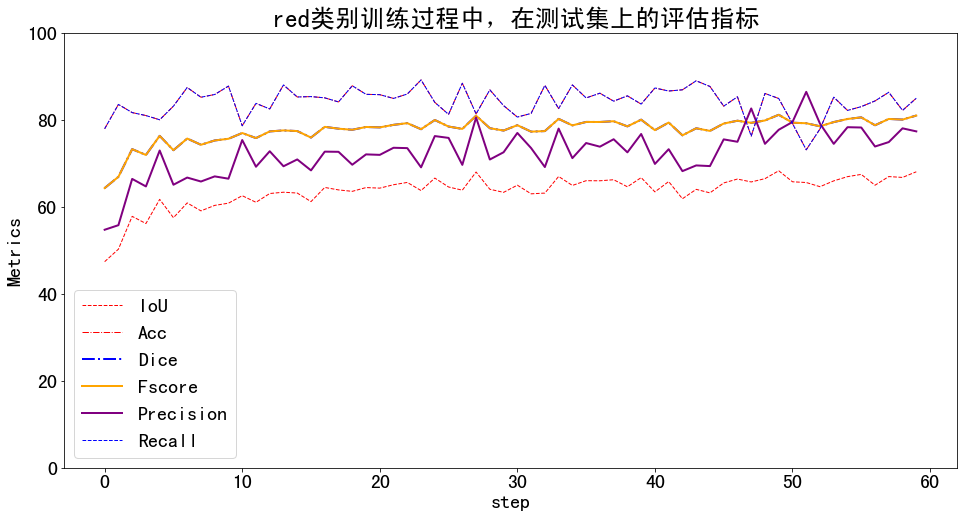

In [39]:
for each_class in class_list: # 遍历每个类别
    each_class_metrics = np.array(metrics_json[each_class]['metrics'])
    
    plt.figure(figsize=(16, 8))

    for idx, each_metric in enumerate(['IoU', 'Acc', 'Dice', 'Fscore', 'Precision', 'Recall']):

        try:
            plt.plot(x, each_class_metrics[:,idx], label=each_metric, **get_line_arg())
        except:
            pass

    plt.tick_params(labelsize=20)
    plt.ylim([0, 100])
    plt.xlabel('step', fontsize=20)
    plt.ylabel('Metrics', fontsize=20)
    plt.title(' {}类别训练过程中，在测试集上的评估指标'.format(each_class), fontsize=25)

    plt.legend(fontsize=20)

    # plt.savefig('类别 {} 训练过程评估指标.pdf'.format(each_class), dpi=120, bbox_inches='tight')

    plt.show()